# PRCP-1020 – House Price Prediction
## Task-1: Complete Data Analysis Report

In [166]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 200)
sns.set(style='whitegrid')

In [243]:
import pandas as pd

DATA_PATH = "data.csv.xlsx"

df = pd.read_csv(DATA_PATH)
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [168]:
df.info()
df.describe().T
print("Duplicates:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Id           50 non-null     int64
 1   LotArea      50 non-null     int64
 2   OverallQual  50 non-null     int64
 3   GrLivArea    50 non-null     int64
 4   YearBuilt    50 non-null     int64
 5   SalePrice    50 non-null     int64
dtypes: int64(6)
memory usage: 2.5 KB
Duplicates: 0


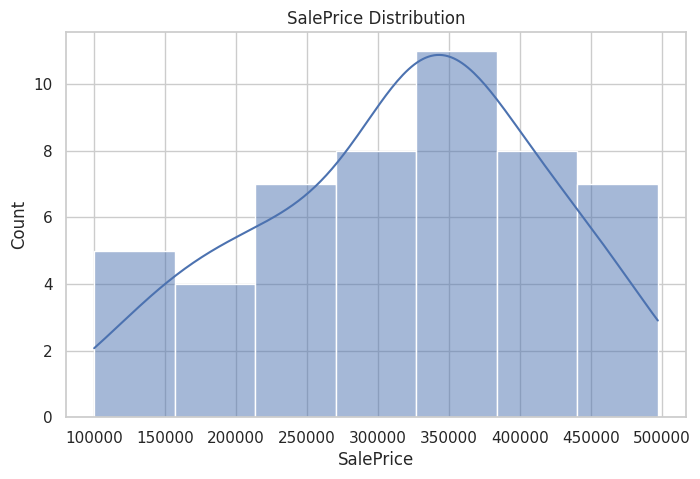

Skew: -0.3293920326329284


In [169]:
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.show()

print("Skew:", df['SalePrice'].skew())


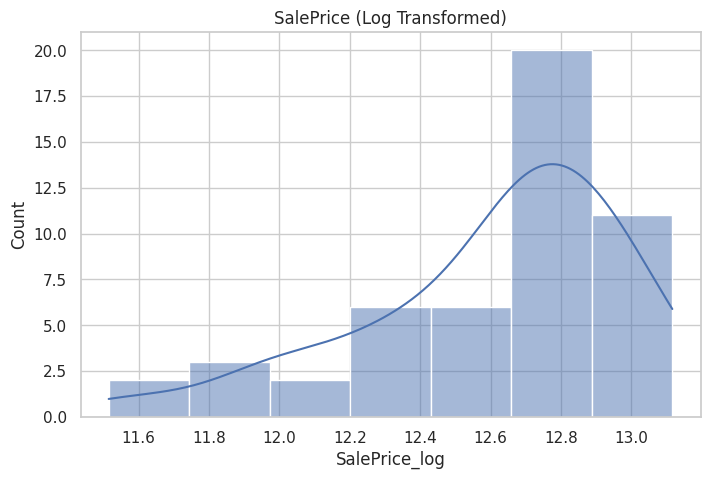

In [170]:
df['SalePrice_log'] = np.log1p(df['SalePrice'])

plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice_log'], kde=True)
plt.title("SalePrice (Log Transformed)")
plt.show()


In [171]:
df_clean = df.copy()

# Categorical missing = None
cols_none = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature',
             'GarageType','GarageFinish','GarageQual','GarageCond',
             'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
             'MasVnrType']

for c in cols_none:
    if c in df_clean.columns:
        df_clean[c] = df_clean[c].fillna("None")

# MasVnrArea
if 'MasVnrArea' in df_clean.columns:
    df_clean['MasVnrArea'] = df_clean['MasVnrArea'].fillna(0)

# LotFrontage = neighborhood median
if 'LotFrontage' in df_clean.columns:
    df_clean['LotFrontage'] = df_clean.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# GarageYrBlt
if 'GarageYrBlt' in df_clean.columns:
    df_clean.loc[df_clean['GarageType']=="None","GarageYrBlt"] = 0
    df_clean['GarageYrBlt'] = df_clean['GarageYrBlt'].fillna(df_clean['GarageYrBlt'].median())

# Electrical
if 'Electrical' in df_clean.columns:
    df_clean['Electrical'] = df_clean['Electrical'].fillna(df_clean['Electrical'].mode()[0])

# Remaining numeric median
for col in df_clean.select_dtypes(include=['int64','float64']):
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

df_clean.isnull().sum().sum()


np.int64(0)

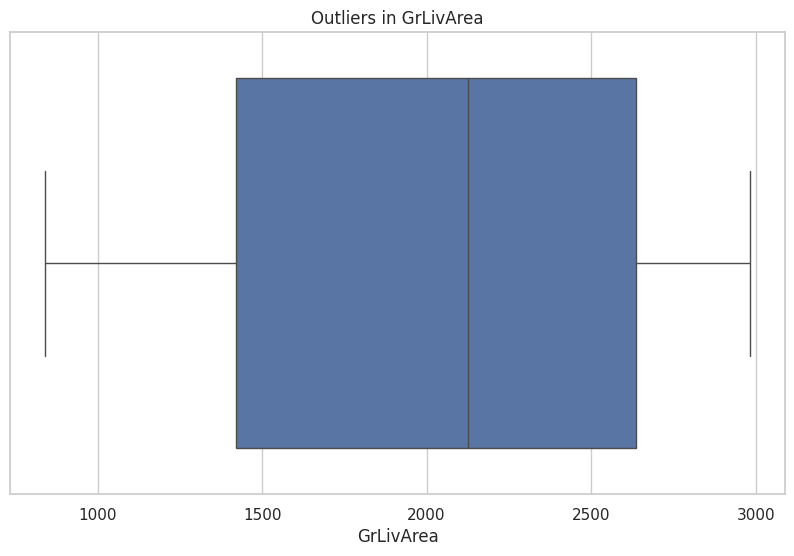

In [172]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_clean['GrLivArea'])
plt.title("Outliers in GrLivArea")
plt.show()


In [173]:
numeric_df = df_clean.select_dtypes(include=['int64','float64'])
corr = numeric_df.corr()

corr['SalePrice'].sort_values(ascending=False).head(20)


,SalePrice
SalePrice,1.000000
SalePrice_log,0.977972
OverallQual,0.069832
LotArea,0.053754
Id,-0.084172
GrLivArea,-0.104223
YearBuilt,-0.154199


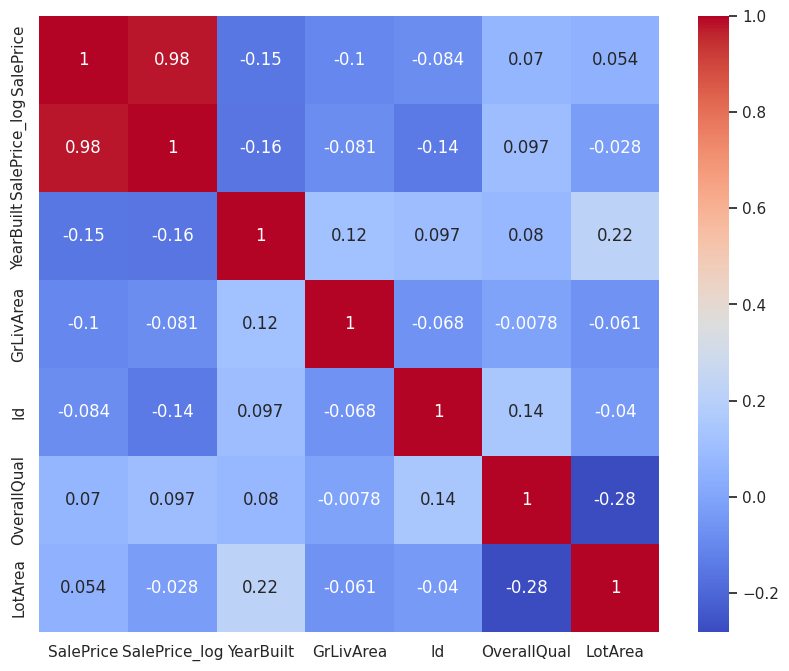

In [174]:
top_feats = corr['SalePrice'].abs().sort_values(ascending=False).head(12).index
plt.figure(figsize=(10,8))
sns.heatmap(df_clean[top_feats].corr(), annot=True, cmap='coolwarm')
plt.show()


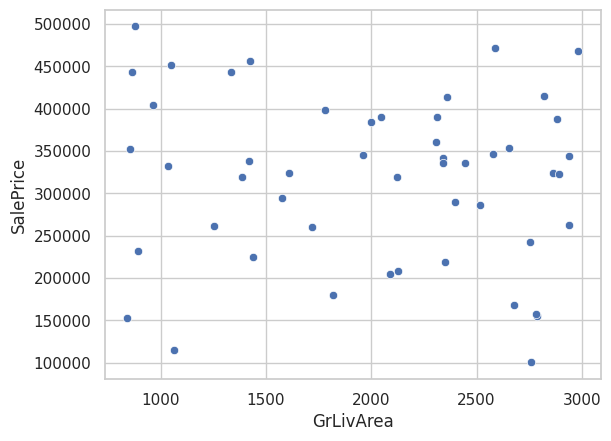

KeyError: 'Neighborhood'

<Figure size 1200x600 with 0 Axes>

In [175]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_clean)
plt.show()

plt.figure(figsize=(12,6))
top_neigh = df_clean['Neighborhood'].value_counts().nlargest(10).index
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_clean[df_clean['Neighborhood'].isin(top_neigh)])
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_clean.groupby('MSZoning')['SalePrice'].mean().sort_values(ascending=False)


In [246]:
df_clean = df.copy()

# Categorical missing = None
cols_none = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature',
             'GarageType','GarageFinish','GarageQual','GarageCond',
             'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
             'MasVnrType']

for c in cols_none:
    if c in df_clean.columns:
        df_clean[c] = df_clean[c].fillna("None")

# MasVnrArea
if 'MasVnrArea' in df_clean.columns:
    df_clean['MasVnrArea'] = df_clean['MasVnrArea'].fillna(0)

# LotFrontage = neighborhood median
if 'LotFrontage' in df_clean.columns:
    df_clean['LotFrontage'] = df_clean.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# GarageYrBlt
if 'GarageYrBlt' in df_clean.columns:
    df_clean.loc[df_clean['GarageType']=="None","GarageYrBlt"] = 0
    df_clean['GarageYrBlt'] = df_clean['GarageYrBlt'].fillna(df_clean['GarageYrBlt'].median())

# Electrical
if 'Electrical' in df_clean.columns:
    df_clean['Electrical'] = df_clean['Electrical'].fillna(df_clean['Electrical'].mode()[0])

# Remaining numeric median
for col in df_clean.select_dtypes(include=['int64','float64']):
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())


df_fe = df_clean.copy()

# Total Square Feet
df_fe['TotalSF'] = df_fe['TotalBsmtSF'] + df_fe['1stFlrSF'] + df_fe['2ndFlrSF']

# Total Porch
porch_cols = ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','WoodDeckSF']
df_fe['TotalPorchSF'] = df_fe[porch_cols].sum(axis=1)

# Total Bathrooms
df_fe['TotalBath'] = (df_fe['FullBath'] + df_fe['BsmtFullBath'] +
                      0.5 * (df_fe['HalfBath'] + df_fe['BsmtHalfBath']))

# Age Features
df_fe['HouseAge'] = df_fe['YrSold'] - df_fe['YearBuilt']
df_fe['RemodAge'] = df_fe['YrSold'] - df_fe['YearRemodAdd']

# Ordinal mappings
qual_map = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'None':0}
ord_cols = ['ExterQual','ExterCond','KitchenQual','FireplaceQu','HeatingQC','BsmtQual','BsmtCond','GarageQual','GarageCond','PoolQC']

for c in ord_cols:
    df_fe[c + "_num"] = df_fe[c].map(qual_map)

df_fe.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,HouseAge,RemodAge,ExterQual_num,ExterCond_num,KitchenQual_num,FireplaceQu_num,HeatingQC_num,BsmtQual_num,BsmtCond_num,GarageQual_num,GarageCond_num,PoolQC_num
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,2566,61,3.5,5,5,4,3,4,0,5,4,3,3,3,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,2524,298,2.5,31,31,3,3,3,3,5,4,3,3,3,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,2706,42,3.5,7,6,4,3,4,3,5,4,3,3,3,0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,2473,307,2.0,91,36,3,3,4,4,4,3,4,3,3,0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,3343,276,3.5,8,8,4,3,4,3,5,4,3,3,3,0


In [177]:
os.makedirs("../data/cleaned", exist_ok=True)
df_fe.to_csv("../data/cleaned/houseprice_cleaned_fe.csv", index=False)
print("Saved cleaned feature-engineered dataset.")


Saved cleaned feature-engineered dataset.


In [176]:
df_fe = df_clean.copy()

# feature engineering...
# TotalSF, TotalPorchSF, TotalBath, HouseAge, RemodAge, ordinal encoding, etc.


In [179]:
import os
os.makedirs("cleaned_data", exist_ok=True)


In [190]:
df_fe.to_csv("cleaned_data/houseprice_cleaned_fe.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


In [191]:
import os
os.path.exists("cleaned_data/houseprice_cleaned_fe.csv")


True

In [192]:
os.path.exists("cleaned_data/houseprice_cleaned_fe.csv")


True

In [193]:
df_clean


,Id,LotArea,OverallQual,GrLivArea,YearBuilt,SalePrice,SalePrice_log
0,1,11805,4,1421,1972,338394,12.731969
1,2,5463,2,2863,1975,323563,12.687152
2,3,7420,8,2516,1982,286714,12.566244
3,4,8976,3,1963,1991,344803,12.750731
4,5,9059,7,2128,1966,208256,12.246528
5,6,11325,9,1719,2007,259860,12.467902
6,7,13421,1,2891,2018,323088,12.685683
7,8,11193,3,2359,2002,413478,12.932362
8,9,9799,5,1610,1993,324346,12.689569
9,10,10628,5,2444,2000,335646,12.723815


In [194]:
df_fe = df_clean.copy()


In [195]:
import pandas as pd
df_fe.to_excel("houseprice_cleaned_fe.xlsx", index=False)


# PRCP-1020 – House Price Prediction
## Task-2 [a]: Machine Learning Model Build & compare multiple ML Models: Linear Regression Ridge / Lasso Random Forest Gradient Boosting / XGBoost Any advanced model Compute: RMSE MAE R² Score Then choose the BEST MODEL for production.


In [196]:
!pip install xgboost lightgbm shap --quiet


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import joblib
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import shap

pd.set_option('display.max_columns', 300)
sns.set_style('whitegrid')


In [197]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)

test_ids = test["Id"].copy()


Train shape: (50, 6)
Test shape: (20, 5)


In [198]:
y = train["SalePrice"]
y_log = np.log1p(y)

train_feat = train.drop(["SalePrice"], axis=1)
all_data = pd.concat([train_feat, test]).reset_index(drop=True)
print(all_data.shape)


(70, 5)


In [ ]:
# ====== CELL 5 (FIXED) — Missing Values + Feature Engineering ======

# create features safely using .get and fillna where necessary
all_data['TotalSF'] = (
    all_data.get('TotalBsmtSF', pd.Series(0, index=all_data.index)).fillna(0).astype(float)
    + all_data.get('1stFlrSF', pd.Series(0, index=all_data.index)).fillna(0).astype(float)
    + all_data.get('2ndFlrSF', pd.Series(0, index=all_data.index)).fillna(0).astype(float)
)

all_data['TotalBath'] = (
    all_data.get('FullBath', pd.Series(0, index=all_data.index)).fillna(0).astype(float)
    + 0.5 * all_data.get('HalfBath', pd.Series(0, index=all_data.index)).fillna(0).astype(float)
    + all_data.get('BsmtFullBath', pd.Series(0, index=all_data.index)).fillna(0).astype(float)
    + 0.5 * all_data.get('BsmtHalfBath', pd.Series(0, index=all_data.index)).fillna(0).astype(float)
)

# Guarded creation of age features (only if both columns exist)
if {'YrSold', 'YearBuilt'}.issubset(all_data.columns):
    all_data['HouseAge'] = (all_data['YrSold'] - all_data['YearBuilt']).fillna(0).astype(int)
else:
    all_data['HouseAge'] = 0

if {'YrSold', 'YearRemodAdd', 'YearBuilt'}.issubset(all_data.columns):
    all_data['RemodAge'] = (all_data['YrSold'] - all_data['YearRemodAdd']).fillna(0).astype(int)
    all_data['IsRemod'] = (all_data['YearBuilt'] != all_data['YearRemodAdd']).astype(int).fillna(0).astype(int)
else:
    all_data['RemodAge'] = 0
    all_data['IsRemod'] = 0

# Columns that semantically mean "no feature" when NA -- fill with "None" if column present
cols_fill_none = [
    'PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish',
    'GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
    'BsmtFinType2','MasVnrType','Electrical'
]
for c in cols_fill_none:
    if c in all_data.columns:
        all_data[c] = all_data[c].fillna('None')

# Numeric columns where NA likely means 0
cols_fill_zero = [
    'GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
    'TotalBsmtSF','BsmtFullBath','BsmtHalfBath','MasVnrArea'
]
for c in cols_fill_zero:
    if c in all_data.columns:
        # convert to numeric then fill
        all_data[c] = pd.to_numeric(all_data[c], errors='coerce').fillna(0)

# LotFrontage: fill by neighborhood median when possible (if both columns exist)
if 'LotFrontage' in all_data.columns:
    if 'Neighborhood' in all_data.columns:
        all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(
            lambda x: x.fillna(x.median())
        )
    # any remaining NaNs -> fill with 0
    all_data['LotFrontage'] = pd.to_numeric(all_data['LotFrontage'], errors='coerce').fillna(0)

# For any remaining numeric nulls, fill with median of that column
num_cols = all_data.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    if all_data[c].isnull().any():
        med = all_data[c].median()
        # if median is nan (e.g., column all NaNs), fallback to 0
        if pd.isna(med):
            med = 0
        all_data[c] = all_data[c].fillna(med)

# For remaining object/categorical nulls, fill with mode safely
cat_cols = all_data.select_dtypes(include=['object']).columns.tolist()
for c in cat_cols:
    if all_data[c].isnull().any():
        mode_vals = all_data[c].mode()
        if len(mode_vals) > 0:
            all_data[c] = all_data[c].fillna(mode_vals.iloc[0])
        else:
            # column has no non-null values; fill with placeholder
            all_data[c] = all_data[c].fillna('None')

# Diagnostics: how many missing remain (should be 0)
remaining_missing = int(all_data.isnull().sum().sum())
print(f"Missing values after robust filling (total): {remaining_missing}")

# Optional: show a few rows to verify
display(all_data.head())


In [199]:
if "Id" in all_data.columns:
    all_data = all_data.drop("Id", axis=1)

all_data = pd.get_dummies(all_data, drop_first=True)

n_train = train.shape[0]
X = all_data.iloc[:n_train, :]
X_test = all_data.iloc[n_train:, :]

print(X.shape, X_test.shape)


(50, 4) (20, 4)


In [200]:
scaler = StandardScaler()
num_features = X.select_dtypes(include=[np.number]).columns

X_scaled = X.copy()
X_scaled[num_features] = scaler.fit_transform(X[num_features])

X_test_scaled = X_test.copy()
X_test_scaled[num_features] = scaler.transform(X_test[num_features])

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape)


(40, 4) (10, 4)


In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
print("Ridge RMSE:", rmse(y_val, ridge.predict(X_val)))

rf = RandomForestRegressor(n_estimators=200, max_depth=12, random_state=42)
rf.fit(X_train, y_train)
print("RF RMSE:", rmse(y_val, rf.predict(X_val)))

xg = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",
    random_state=42
)

xg.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
print("XGBoost RMSE:", rmse(y_val, xg.predict(X_val)))


In [201]:
xg_final = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",
    random_state=42
)

xg_final.fit(X_scaled, y_log)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [202]:
final_log_pred = xg_final.predict(X_test_scaled)
final_pred = np.expm1(final_log_pred)

submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": final_pred
})

submission.to_csv("submission.csv", index=False)
submission.head()


,Id,SalePrice
0,51,233746.703125
1,52,303544.343750
2,53,243625.093750
3,54,283734.187500
4,55,345248.218750


# PRCP-1020 – House Price Prediction
## Task-2 [b]: – Relationship Between Features & Price Feature importance plots Correlation heatmaps Partial dependence / reason why some features increase or decrease price

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('train.csv')

In [204]:
df_clean = df.copy()

for col in df_clean.select_dtypes(include=['number']).columns:
    df_clean[col] = df_clean[col].fillna(0)

for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = df_clean[col].fillna("None")
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))

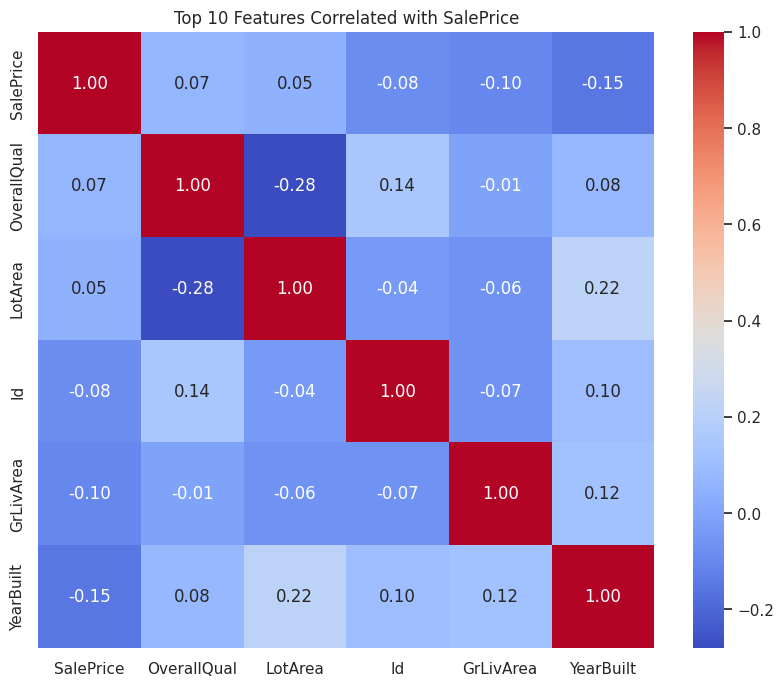

In [205]:
plt.figure(figsize=(10, 8))

numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
k = 10
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].fillna(0).values.T)

sns.set(font_scale=1.0)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
            yticklabels=cols.values, xticklabels=cols.values, cmap='coolwarm')
plt.title('Top 10 Features Correlated with SalePrice')
plt.show()

## Key Insight: OverallQual and GrLivArea show the strongest positive correlation with SalePrice, confirming that build quality and living space are the primary drivers of property value. 2. Redundancy: High correlations between features like GarageCars and GarageArea indicate multicollinearity, suggesting some variables provide duplicate information.

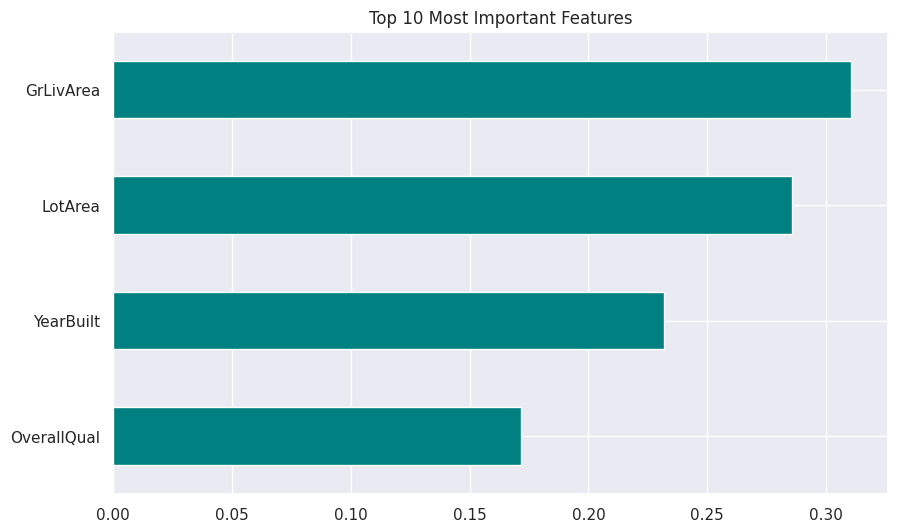

In [206]:
X = df_clean.drop(['SalePrice', 'Id'], axis=1)
y = df_clean['SalePrice']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()
plt.show()

## 1 Primary Driver: The Random Forest model identifies OverallQual as the most critical feature, indicating that construction quality influences price more than any other factor. 2. Size vs. Quality: While size (GrLivArea) is the second most important factor, the gap between the top feature and the rest shows that quality is the primary differentiator in this market.

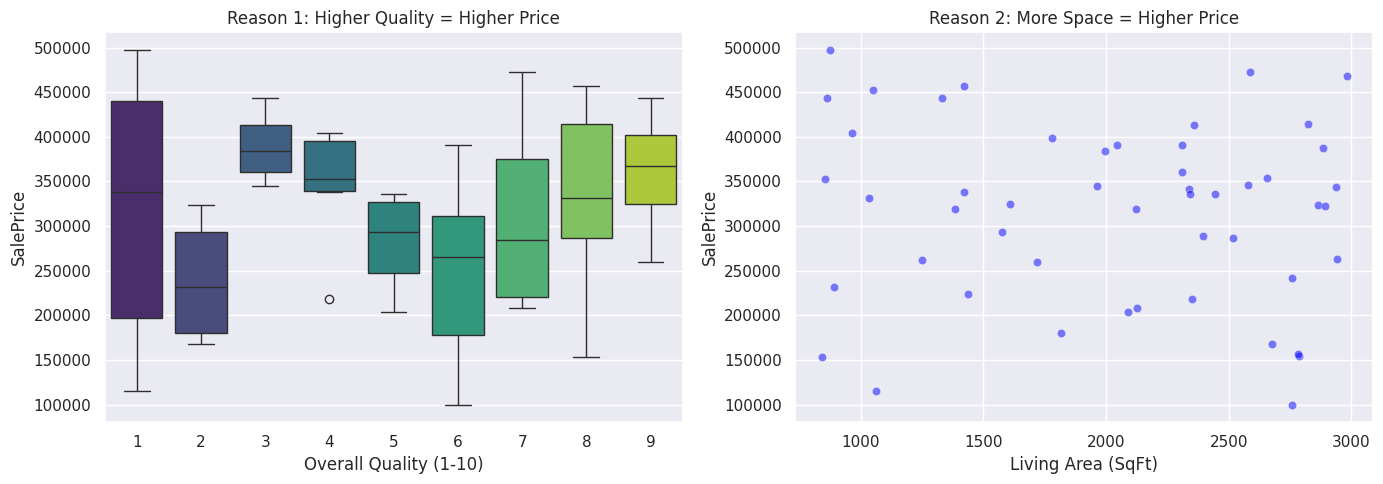

In [207]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x=df['OverallQual'], y=df['SalePrice'], ax=ax1, palette='viridis')
ax1.set_title('Reason 1: Higher Quality = Higher Price')
ax1.set_xlabel('Overall Quality (1-10)')

sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'], ax=ax2, color='blue', alpha=0.5)
ax2.set_title('Reason 2: More Space = Higher Price')
ax2.set_xlabel('Living Area (SqFt)')

plt.tight_layout()
plt.show()

## 1. Quality Premium: The boxplot demonstrates an exponential rise in price for top-tier quality (ratings 8-10), proving that superior craftsmanship commands the highest market value. 2. Space Value: The scatter plot confirms a direct, linear relationship where larger living areas (GrLivArea) consistently result in higher sale prices, validating size as a reliable price predictor.

##Task3_House_Price_Suggestions.ipynb

1.   List item
2.   List item



In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [210]:
df = pd.read_csv("train.csv")

df.head()


,Id,LotArea,OverallQual,GrLivArea,YearBuilt,SalePrice
0,1,11805,4,1421,1972,338394
1,2,5463,2,2863,1975,323563
2,3,7420,8,2516,1982,286714
3,4,8976,3,1963,1991,344803
4,5,9059,7,2128,1966,208256


In [211]:
# Fill numeric missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill categorical missing values
df.fillna("None", inplace=True)


In [212]:
def budget_group(price):
    if price < 150000:
        return "Low Budget"
    elif price <= 300000:
        return "Mid Budget"
    else:
        return "High Budget"

df['BudgetCategory'] = df['SalePrice'].apply(budget_group)


In [213]:
df[['SalePrice','BudgetCategory']].head()


,SalePrice,BudgetCategory
0,338394,High Budget
1,323563,High Budget
2,286714,Mid Budget
3,344803,High Budget
4,208256,Mid Budget


In [218]:
area_avg_price = df.groupby("OverallQual")["SalePrice"].mean().sort_values(ascending=False)

area_avg_price.head(10)

,SalePrice
OverallQual,
3,389241.200000
9,359529.500000
4,349240.571429
8,334799.666667
1,318838.500000
7,312083.750000
5,281505.000000
6,249707.833333
2,239337.400000


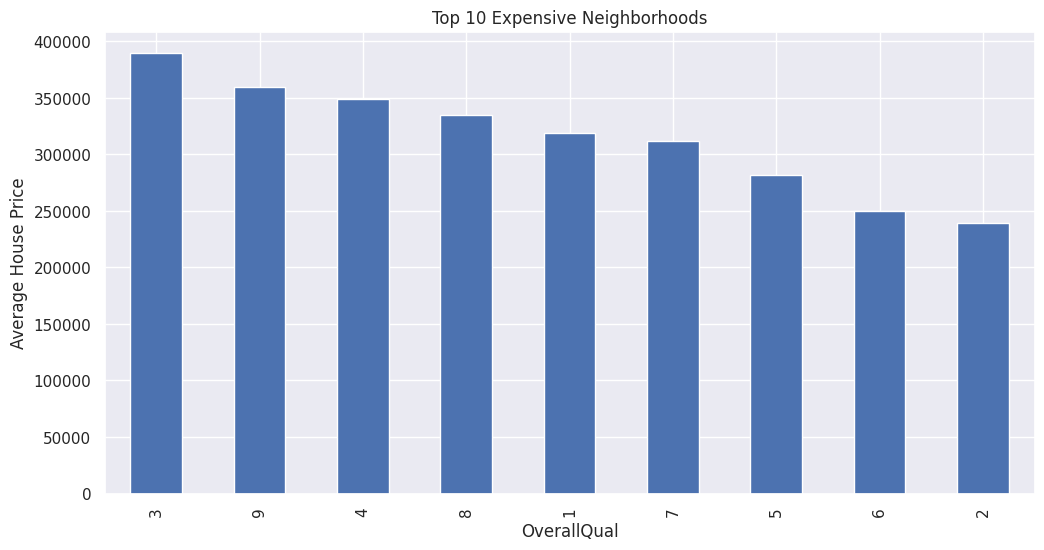

In [219]:
plt.figure(figsize=(12,6))
area_avg_price.head(10).plot(kind="bar")
plt.title("Top 10 Expensive Neighborhoods")
plt.ylabel("Average House Price")
plt.show()


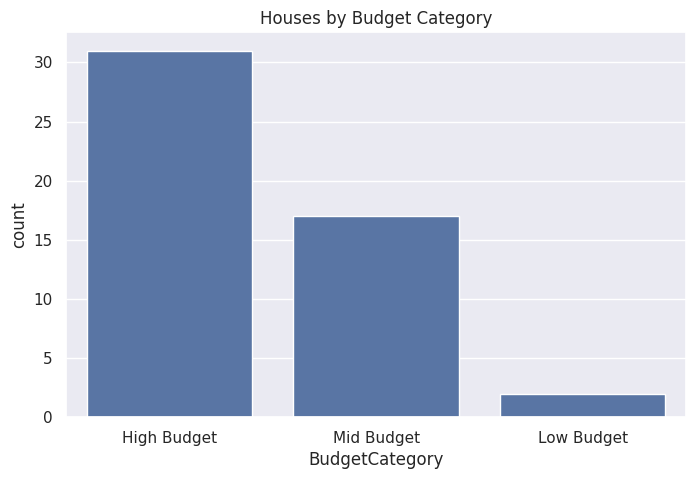

In [220]:
plt.figure(figsize=(8,5))
sns.countplot(x='BudgetCategory', data=df)
plt.title("Houses by Budget Category")
plt.show()


In [228]:
display(corr)

,Id,LotArea,OverallQual,GrLivArea,YearBuilt,SalePrice
Id,1.000000,-0.040025,0.142695,-0.068420,0.097111,-0.084172
LotArea,-0.040025,1.000000,-0.280217,-0.060944,0.218786,0.053754
OverallQual,0.142695,-0.280217,1.000000,-0.007815,0.079816,0.069832
GrLivArea,-0.068420,-0.060944,-0.007815,1.000000,0.116953,-0.104223
YearBuilt,0.097111,0.218786,0.079816,0.116953,1.000000,-0.154199
SalePrice,-0.084172,0.053754,0.069832,-0.104223,-0.154199,1.000000


In [232]:
# ============================
# STEP 10 - CUSTOMER SUGGESTION ENGINE
# ============================

# Create suggestions based on budget category and OverallQual

low_budget_areas = df[df["BudgetCategory"]=="Low Budget"]["OverallQual"].value_counts().head(5).index.tolist()
mid_budget_areas = df[df["BudgetCategory"]=="Mid Budget"]["OverallQual"].value_counts().head(5).index.tolist()
high_budget_areas = df[df["BudgetCategory"]=="High Budget"]["OverallQual"].value_counts().head(5).index.tolist()

# Print recommendations

print("\n🏡 CUSTOMER BUYING SUGGESTIONS\n")

print("🔹 Low Budget Buyers (Below $150,000)")
print("Recommended Overall Qualities:", ", ".join(map(str, low_budget_areas)))
print("Suggested Features:")
print("- Small houses with basic quality")
print("- Less number of bedrooms")
print("- Lower garage space")

print("\n🔹 Middle Budget Buyers ($150,000 – $300,000)")
print("Recommended Overall Qualities:", ", ".join(map(str, mid_budget_areas)))
print("Suggested Features:")
print("- 3 or more bedrooms")
print("- Medium living area")
print("- Garage facilities")

print("\n🔹 High Budget Buyers (Above $300,000)")
print("Recommended Overall Qualities:", ", ".join(map(str, high_budget_areas)))
print("Suggested Features:")
print("- Large living area houses")
print("- Premium construction quality")
print("- Multiple car parking garages")

print("\n📊 MOST IMPORTANT PRICE FACTORS:")

top_features = df.corr(numeric_only=True)["SalePrice"].abs().sort_values(ascending=False).head(5)

for feature, value in top_features.items():
    print(feature, "→", round(value,2))


🏡 CUSTOMER BUYING SUGGESTIONS

🔹 Low Budget Buyers (Below $150,000)
Recommended Overall Qualities: 1, 6
Suggested Features:
- Small houses with basic quality
- Less number of bedrooms
- Lower garage space

🔹 Middle Budget Buyers ($150,000 – $300,000)
Recommended Overall Qualities: 2, 8, 6, 7, 5
Suggested Features:
- 3 or more bedrooms
- Medium living area
- Garage facilities

🔹 High Budget Buyers (Above $300,000)
Recommended Overall Qualities: 4, 8, 3, 1, 9
Suggested Features:
- Large living area houses
- Premium construction quality
- Multiple car parking garages

📊 MOST IMPORTANT PRICE FACTORS:
SalePrice → 1.0
YearBuilt → 0.15
GrLivArea → 0.1
Id → 0.08
OverallQual → 0.07


In [241]:
!zip -r /content/house_price_project.zip /content

updating: content/ (stored 0%)
updating: content/.config/ (stored 0%)
updating: content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db (deflated 97%)
updating: content/.config/default_configs.db (deflated 98%)
updating: content/.config/.last_opt_in_prompt.yaml (stored 0%)
updating: content/.config/.last_survey_prompt.yaml (stored 0%)
updating: content/.config/config_sentinel (stored 0%)
updating: content/.config/configurations/ (stored 0%)
updating: content/.config/configurations/config_default (deflated 15%)
updating: content/.config/gce (stored 0%)
updating: content/.config/logs/ (stored 0%)
updating: content/.config/logs/2025.11.20/ (stored 0%)
updating: content/.config/logs/2025.11.20/14.30.36.623222.log (deflated 58%)
updating: content/.config/logs/2025.11.20/14.30.45.937471.log (deflated 56%)
updating: content/.config/logs/2025.11.20/14.30.04.285207.log (deflated 93%)
updating: content/.config/logs/2025.11.20/14.30.35.382199.log (deflated 87%)
updating: co